<a href="https://colab.research.google.com/github/Tayoutai/coffee-typica-backend/blob/develop/notebooks/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
flav = pd.read_csv('../resources/scaa_coffee_flavour_wheel.csv')
flav = flav.astype('string')

flav['level'] = 3 - flav[['category','group','attribute']].isna().sum(axis=1)

flav['has_child'] = False

has_child = flav[flav['level'] >= 1].groupby('category')['group']\
    .transform(lambda x: np.any(~x.isna())).rename('has_child')

index = flav[flav['level'] == 1].index.array
flav.loc[index,'has_child'] = has_child.loc[index]

has_child = flav[flav['level'] >= 2].groupby('group')['attribute']\
    .transform(lambda x: np.any(~x.isna())).rename('has_child')
index = flav[flav['level'] == 2].index.array
flav.loc[index,'has_child'] = has_child.loc[index]

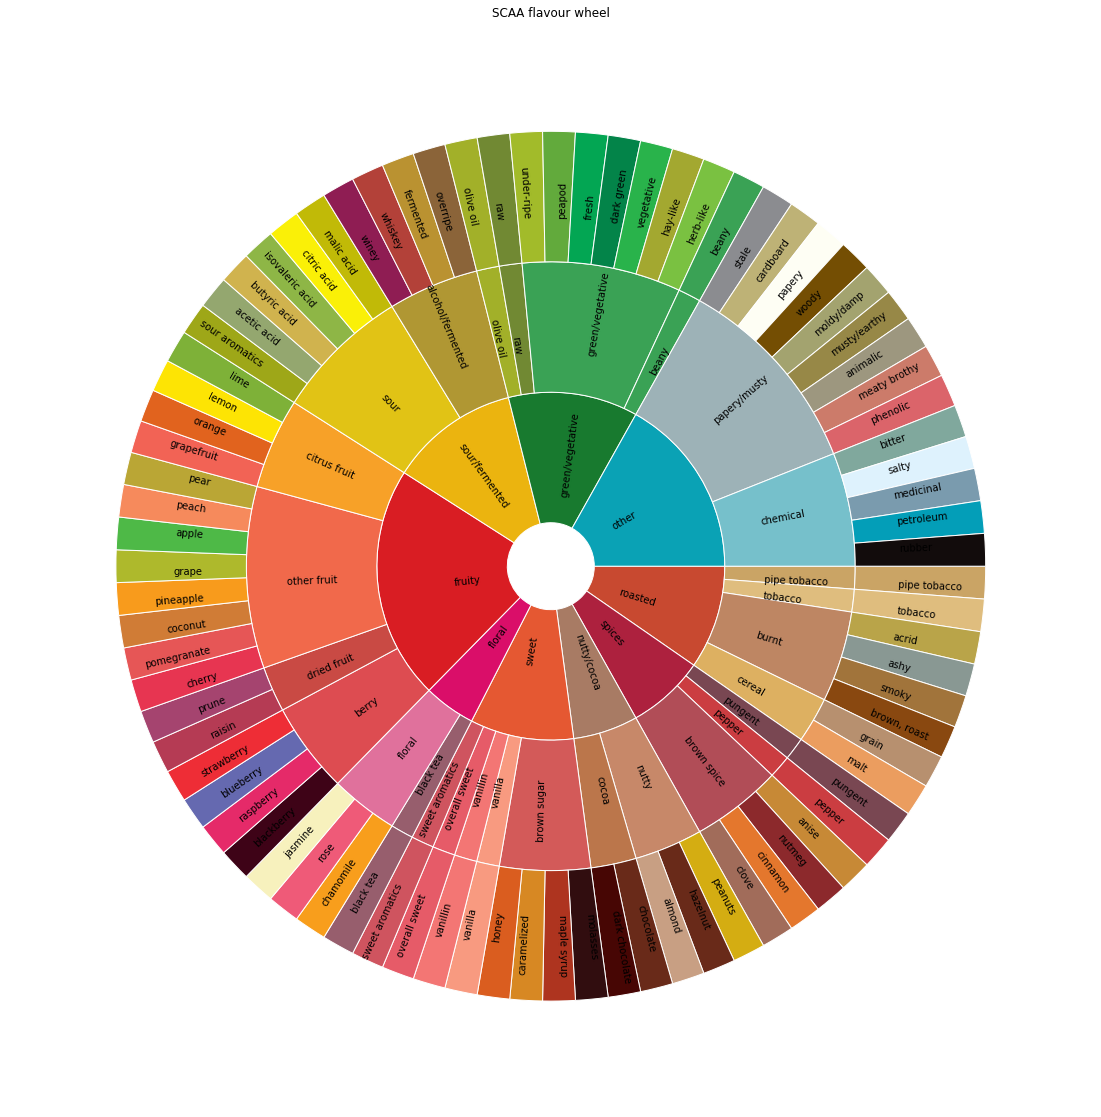

,category,group,attribute,color,level,has_child,count,name
1,roasted,pipe tobacco,<NA>,#caa465,2,False,1,pipe tobacco
2,roasted,tobacco,<NA>,#dfbd7e,2,False,1,tobacco
4,roasted,burnt,acrid,#b9a449,3,False,1,acrid
5,roasted,burnt,ashy,#899893,3,False,1,ashy
6,roasted,burnt,smoky,#a1743b,3,False,1,smoky
...,...,...,...,...,...,...,...,...
103,other,chemical,bitter,#80a89d,3,False,1,bitter
104,other,chemical,salty,#def2fd,3,False,1,salty
105,other,chemical,medicinal,#7a9bae,3,False,1,medicinal
106,other,chemical,petroleum,#039eb8,3,False,1,petroleum


In [11]:
fig, ax = plt.subplots()

fig_size= plt.gcf().get_size_inches()
plt.gcf().set_size_inches(5 * fig_size) 

size = 0.3


df1 = flav[flav['level'] >= 1].copy()
df1['count'] = df1.groupby('category')['has_child'].transform(lambda x: sum(~x)).rename('count')
df1 = df1[df1['level'] == 1]

plt.pie(df1['count'], colors=df1['color'], labels=df1['category'], counterclock=False, rotatelabels=270,
       radius=1-2*size, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.4)

df2 = flav[flav['level'] >= 2].copy()
df2['count'] = df2.groupby('group')['has_child'].transform(lambda x: sum(~x)).rename('count')
df2 = df2[df2['level'] == 2]

plt.pie(df2['count'], colors=df2['color'], labels=df2['group'], counterclock=False, rotatelabels=270,
       radius=1-1*size, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.7)


df3 = flav[(flav['level'] >= 3) | ~flav['has_child']].copy()
df3['count'] = 1

df3['name'] = ''
df3.loc[df3['level']==3,'name'] = df3.loc[df3['level']==3,'attribute']
df3.loc[df3['level']==2,'name'] = df3.loc[df3['level']==2,'group']
df3.loc[df3['level']==1,'name'] = df3.loc[df3['level']==1,'category']

plt.pie(df3['count'], colors=df3['color'], labels=df3['name'], counterclock=False, rotatelabels=270,
        radius=1-0*size, wedgeprops=dict(width=size, edgecolor='w'), labeldistance=0.8)


ax.set(aspect="equal", title='SCAA flavour wheel')
plt.show()

df3